In [1]:
from bs4 import BeautifulSoup
import pandas as pd  
import os
import numpy as np

### Парсер html страниц хабра

In [11]:
# Получаем текущую рабочую директорию
current_directory = os.getcwd()

# Имя подпапки, которую вы ищете
folder_name = "data"

# Создаем путь к целевой папке
folder_path = os.path.join(current_directory, folder_name)

data_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.html'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        soup = BeautifulSoup(file_content, 'html.parser')

        rating = soup.find('span', {'class': 'tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating'})
        company = soup.find('a', {'class': 'tm-company-card__name'})
        titles = soup.find_all('a', {'class': 'tm-title__link'})
        articles = soup.find_all('div', {'class': 'article-formatted-body'})
        votes = soup.find_all('span', {'class': 'tm-votes-meter__value'})
        views = soup.find_all('span', {'class': 'tm-icon-counter__value'})
        comments = soup.find_all('span', {'class': 'bookmarks-button__counter'})
        
        rating_text = rating.get_text().strip()
        company_text = company.get_text().strip()
        titles_text = [link.get_text().strip() for link in titles]
        articles_text = [link.get_text().strip() for link in articles]
        votes_text = [link.get_text().strip() for link in votes]
        views_text = [link.get_text().strip() for link in views]
        comments_text = [link.get_text().strip() for link in comments]

        rating_values = [rating_text] * len(votes_text)
        company_values = [company_text] * len(votes_text)

        elements_dict = {
            'rating': rating_values,
            'company': company_values,
            'titles': titles_text,
            'articles': articles_text,
            'votes': votes_text,
            'views': views_text,
            'comments': comments_text,
        }

        data_list.append(elements_dict)

df = pd.DataFrame(data_list)
df = df.apply(lambda col: col.explode()).reset_index(drop=True)
df

,rating,company,titles,articles,votes,views,comments
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",-6,702,3
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",-16,16K,25
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,+19,5.7K,74
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,+11,1.7K,12
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",+25,14K,82
...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",+17,7.6K,60
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",+5,935,2
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",+7,1.2K,11
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,+67,3.3K,15


In [12]:
def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)


df['views'] = df['views'].apply(convert_to_int)

df[['views', 'comments']] = df[['views', 'comments']].astype(int)
df[['rating']] = df[['rating']].astype(float)

df['votes'] = df['votes'].str.replace('[+,-]', '', regex=True)
df['votes'] = pd.to_numeric(df['votes'])

df

,rating,company,titles,articles,votes,views,comments
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",6,702,3
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",16,16000,25
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,19,5700,74
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,11,1700,12
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",25,14000,82
...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",17,7600,60
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",5,935,2
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",7,1200,11
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,67,3300,15


In [3]:
df.to_csv("output.csv", index=False)

In [4]:
data = pd.read_csv("output.csv")
data

,rating,company,titles,articles
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе..."
...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои..."
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...


### Предобработка данных(токенизация, лемматизация...)

In [5]:
import re
import nltk
import emoji
import unicodedata
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy2 import MorphAnalyzer
import string

nltk.download('stopwords')
nltk.download('punkt', quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
morph = MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# Функция для токенизации, лемматизации и удаления стоп-слов
def preprocess_text(text):
    #удаление эмоджи
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Токенизация
    tokens = word_tokenize(text)
    
    numbers = [i for i in range(10)]
    numbers = list(map(str, numbers))
    
#     text = re.sub(r'[^\w\s]', '', text)
    text = [word.lower() for word in word_tokenize(text) if re.match(r'\w', word)]

    # Лемматизация
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    
    # Удаление стоп-слов и пунктуации
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]
    
    return ' '.join(filtered_tokens)

data['processed_articles'] = data['articles'].apply(preprocess_text)
data['processed_titles'] = data['titles'].apply(preprocess_text)

print(data[['articles', 'processed_articles']].head())
print(data[['titles', 'processed_titles']].head())

                                            articles  \
0  Криптовалюты пока не захватили мир, потому что...   
1  Привет, читатель! Хотел поделиться историей о ...   
2  Под Новый Год мы с женой пересматриваем одну п...   
3  Привет! Я Лёша. Cейчас руковожу командами эмоц...   
4  Меня зовут Константин, последние 6 лет я профе...   

                                  processed_articles  
0  криптовалюта пока захватить мир мозг начинать ...  
1  привет читатель хотеть поделиться история прий...  
2  новый год жена пересматривать популярный магич...  
3  привет лёша cейчас руководить команда эмоциона...  
4  звать константин последний 6 год профессиональ...  
                                              titles  \
0  Место крипты в реальном мире, или Куда придёт ...   
1             Как я в 22 года получил «лычку» Senior   
2  Практическая магия Istio при построении архите...   
3                     Зачем вам эмоциоанльный дизайн   
4  Что я делал, когда развивал свою карьеру бэкен... 

In [7]:
data

,rating,company,titles,articles,processed_articles,processed_titles
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",криптовалюта пока захватить мир мозг начинать ...,место крипта реальный мир прийти веб завтра
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",привет читатель хотеть поделиться история прий...,22 год получить « лычко » senior
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,новый год жена пересматривать популярный магич...,практический магия istio построение архитектур...
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,привет лёша cейчас руководить команда эмоциона...,эмоциоанльный дизайн
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",звать константин последний 6 год профессиональ...,делать развивать свой карьера бэкенд разработчик
...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",хабра привет саша product manager ozon хотеть ...,создание карта зависимость увидеть системный у...
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",привет звать дима руководитель группа разработ...,приглашать ozon tech community qa meetup
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",весь привет – влад руководитель группа поисков...,приглашать ozon tech community go meetup
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,современный устройство браузер развиваться дос...,видеоредактор работа видео canvas


In [8]:
df_idf = data.copy()
df_idf

,rating,company,titles,articles,processed_articles,processed_titles
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",криптовалюта пока захватить мир мозг начинать ...,место крипта реальный мир прийти веб завтра
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",привет читатель хотеть поделиться история прий...,22 год получить « лычко » senior
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,новый год жена пересматривать популярный магич...,практический магия istio построение архитектур...
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,привет лёша cейчас руководить команда эмоциона...,эмоциоанльный дизайн
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",звать константин последний 6 год профессиональ...,делать развивать свой карьера бэкенд разработчик
...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",хабра привет саша product manager ozon хотеть ...,создание карта зависимость увидеть системный у...
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",привет звать дима руководитель группа разработ...,приглашать ozon tech community qa meetup
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",весь привет – влад руководитель группа поисков...,приглашать ozon tech community go meetup
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,современный устройство браузер развиваться дос...,видеоредактор работа видео canvas


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Преобразование текста в TF-IDF признаки
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_articles'])

# Кластеризация методом K-means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Вывод результатов кластеризации
print(data[['processed_articles', 'cluster']])


c:\Users\huawei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    processed_articles  cluster
0    криптовалюта пока захватить мир мозг начинать ...        2
1    привет читатель хотеть поделиться история прий...        0
2    новый год жена пересматривать популярный магич...        0
3    привет лёша cейчас руководить команда эмоциона...        0
4    звать константин последний 6 год профессиональ...        0
..                                                 ...      ...
215  хабра привет саша product manager ozon хотеть ...        2
216  привет звать дима руководитель группа разработ...        1
217  весь привет – влад руководитель группа поисков...        1
218  современный устройство браузер развиваться дос...        1
219  рассмотреть возможность android studio позволя...        0

[220 rows x 2 columns]


In [13]:
data['cluster'].unique()

array([2, 0, 1])

**Word2vec + биграммы - ну такое если честно получилось**

In [96]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('russian'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df_idf['processed_articles'] = df_idf['articles'].apply(preprocess_text)
df_idf['processed_titles'] = df_idf['titles'].apply(preprocess_text)

df_idf['combined_text'] = df_idf['processed_articles'].apply(lambda x: ' '.join(x)) + ' ' + df_idf['processed_titles'].apply(lambda x: ' '.join(x))

# Обучение Word2Vec
combined_text = df_idf['combined_text'].apply(preprocess_text)
word2vec_model = Word2Vec(sentences=combined_text, vector_size=100, window=5, min_count=1, workers=4)

# Функция для получения векторов слов в виде списка
def get_word_vectors(text, model):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    return vectors

df_idf['vector_titles'] = df_idf['processed_titles'].apply(lambda x: get_word_vectors(x, word2vec_model))
df_idf['vector_articles'] = df_idf['processed_articles'].apply(lambda x: get_word_vectors(x, word2vec_model))

In [97]:
df_idf.vector_titles[0]

[array([ 2.9363043e-03, -4.0713846e-04, -7.2126077e-03, -9.2044668e-03,
        -4.3350523e-03,  6.2929192e-03,  6.4436425e-03, -5.1803538e-05,
        -7.7819405e-03, -3.8332867e-03,  7.3094484e-03,  1.2100762e-03,
        -1.2455815e-03, -1.1432206e-03,  1.7482839e-03, -9.4170226e-03,
         6.2493421e-04,  8.3842557e-03, -3.9976910e-03,  1.8317288e-03,
        -7.0773396e-03, -4.1104602e-03,  7.4209692e-04,  1.3692850e-04,
        -7.7200594e-04,  5.6485021e-03,  4.2668968e-03, -5.3987885e-03,
         5.3182156e-03, -7.5866375e-03, -3.7502679e-05,  4.9155722e-03,
        -6.8635154e-03,  2.9387262e-03, -9.2270290e-03,  3.0458237e-03,
        -5.2950755e-03,  3.1281975e-03,  5.1462641e-03, -2.4163758e-03,
         1.1889337e-03,  5.4796427e-03,  8.5671535e-03,  4.2470507e-03,
         5.6753810e-03, -1.9001203e-03,  2.8434634e-04,  1.1728633e-03,
        -5.7140705e-03, -1.2401348e-03, -9.6072275e-03, -1.8514687e-04,
         6.7621506e-05,  8.7186042e-03,  3.6871845e-03,  4.51274

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Объединение всех векторов слов в один массив
all_vectors = df_idf['vector_titles'].sum() + df_idf['vector_articles'].sum()

# Преобразование списка в массив numpy
all_vectors_array = np.array(all_vectors)

# Создание экземпляра MinMaxScaler
min_max_scaler = MinMaxScaler()

# Применение Min-Max Scaling к векторам
min_max_scaled_vectors = min_max_scaler.fit_transform(all_vectors_array)

df_idf['vector_titles_minmax'] = df_idf['vector_titles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf['vector_articles_minmax'] = df_idf['vector_articles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax
0,561.22,FirstVDS,Тридцать лет спустя: увеличение скорости квант...,Алгоритм Шора позволит квантовым компьютерам б...,"[алгоритм, шора, позволит, квантовым, компьюте...","[тридцать, лет, спустя, увеличение, скорости, ...",алгоритм шора позволит квантовым компьютерам б...,"[[0.0029363043, -0.00040713846, -0.0072126077,...","[[0.0015495537, 0.0063939933, -0.007542331, 0....","[[0.65894735, 0.45329976, 0.136536, 0.04064405...","[[0.59252477, 0.77427447, 0.12073538, 0.732566..."
1,561.22,FirstVDS,К 60-летию «Доктора Кто»: как появился культов...,23 ноября 2023 года было знаменательное событи...,"[23, ноября, 2023, года, знаменательное, событ...","[доктора, появился, культовый, сериал]",23 ноября 2023 года знаменательное событие люб...,"[[-0.0036283983, 0.009419589, -0.0075871237, 0...","[[-0.006892202, 0.007976558, 0.0039073844, 0.0...","[[0.34451103, 0.91706544, 0.118588865, 0.85395...","[[0.18818125, 0.84896255, 0.66941595, 0.748307..."
2,561.22,FirstVDS,Macintosh 128K: от мечты к легенде в мире комп...,Не так давно вышло обновление macOS 14 Sonoma....,"[давно, вышло, обновление, macos, 14, sonoma, ...","[macintosh, 128k, мечты, легенде, мире, компью...",давно вышло обновление macos 14 sonoma некотор...,"[[0.0004432539, 0.0025649033, -0.004158892, -0...","[[-0.009489374, 0.0038592264, 0.0039618327, -0...","[[0.53953516, 0.59356326, 0.2828728, 0.3447731...","[[0.0637818, 0.65464795, 0.6720252, 0.3045624,..."
3,561.22,FirstVDS,Архитектурные нюансы OpenStack. Базы данных ка...,"Привет, Хабр. Это вторая статья в цикле, в кот...","[привет, хабр, это, вторая, статья, цикле, кот...","[архитектурные, нюансы, openstack, базы, данны...",привет хабр это вторая статья цикле котором ра...,"[[0.0019812807, -0.0067067235, -0.0002904628, ...","[[-0.009757317, 0.010879377, 0.00030648956, -0...","[[0.61320364, 0.15599519, 0.46825138, 0.159761...","[[0.050947905, 0.9859591, 0.49685785, 0.359504..."
4,561.22,FirstVDS,Как вредоносы распространялись через поддельны...,"Приветствую, и снова я начну с вопроса. И дост...","[приветствую, снова, начну, вопроса, достаточн...","[вредоносы, распространялись, поддельный, мене...",приветствую снова начну вопроса достаточно неп...,"[[-0.005502174, -0.0054230043, 0.009679466, 0....","[[0.0035247528, 0.0059877555, 0.0073248493, -0...","[[0.25476086, 0.21657944, 0.9460193, 0.5264672...","[[0.6871329, 0.7551024, 0.83318394, 0.29681957..."
...,...,...,...,...,...,...,...,...,...,...,...
215,909.77,МТС,Bluetooth уже больше 25 лет. В Университете Са...,"Bluetooth уже четверть века, во что иногда сло...","[bluetooth, четверть, века, сложно, поверить, ...","[bluetooth, 25, лет, университете, сассекса, р...",bluetooth четверть века сложно поверить кажетс...,"[[-0.0024911633, -0.005401593, -0.009231342, -...","[[-0.0024911633, -0.005401593, -0.009231342, -...","[[0.39898235, 0.21758991, 0.03979644, 0.382067...","[[0.39898235, 0.21758991, 0.03979644, 0.382067..."
216,909.77,МТС,Возвращение классических консолей продолжается...,За последние несколько лет производители класс...,"[последние, несколько, лет, производители, кла...","[возвращение, классических, консолей, продолжа...",последние несколько лет производители классиче...,"[[-0.007847522, -0.002514848, 0.0054041366, 0....","[[-0.0028271743, -0.0039159325, -0.0066326177,...","[[0.14242327, 0.35382786, 0.7411417, 0.9676727...","[[0.38288808, 0.28770465, 0.16432965, 0.663798..."
217,909.77,МТС,Маленький да удаленький: лучшие миниатюрные ла...,С каждым годом всё больше людей открывает для ...,"[каждым, годом, всё, людей, открывает, возможн...","[маленький, удаленький, лучшие, миниатюрные, л...",каждым годом всё людей открывает возможности л...,"[[0.006784218, 0.0054782894, -0.0058513405, -0...","[[-0.007877721, -0.0003796056, -0.0023331458, ...","[[0.84325486, 0.7310585, 0.20176914, 0.3321400...","[[0.14097682, 0.45459

In [99]:
df_idf.vector_titles_minmax[0]

array([[0.65894735, 0.45329976, 0.136536  , 0.04064405, 0.2823257 ,
        0.82361746, 0.8005313 , 0.42329228, 0.13682166, 0.3111179 ,
        0.866828  , 0.5941949 , 0.44360027, 0.4343367 , 0.5829445 ,
        0.10854208, 0.527874  , 0.9248059 , 0.30029893, 0.65351915,
        0.13922235, 0.29177627, 0.4851487 , 0.5139506 , 0.49487558,
        0.77212554, 0.7201192 , 0.24489832, 0.77070886, 0.1390157 ,
        0.45680195, 0.74413323, 0.1668542 , 0.6670537 , 0.06104195,
        0.63677573, 0.23363727, 0.660488  , 0.7774003 , 0.42978728,
        0.55651355, 0.7874608 , 0.9298746 , 0.6892299 , 0.77348673,
        0.40792155, 0.5337488 , 0.5466314 , 0.21268037, 0.39697292,
        0.02229148, 0.50799644, 0.50762695, 0.93674916, 0.69509506,
        0.5153492 , 0.15117633, 0.8259175 , 0.7126826 , 0.72109556,
        0.40508088, 0.11424029, 0.40006584, 0.08088151, 0.6813652 ,
        0.2655806 , 0.74639773, 0.3845088 , 0.8117969 , 0.7265163 ,
        0.4655667 , 0.8729407 , 0.26594132, 0.53

In [100]:
def extract_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

n = 2 #биграммы 
df_idf['articles_ngrams'] = df_idf['processed_articles'].apply(lambda x: extract_ngrams(x, n))
df_idf['titles_ngrams'] = df_idf['processed_titles'].apply(lambda x: extract_ngrams(x, n))

In [101]:
vectorizer = TfidfVectorizer()
X_combined = vectorizer.fit_transform(df_idf['combined_text'])

df_vectors_combined = pd.DataFrame(X_combined.toarray(), columns=vectorizer.get_feature_names_out())

df_idf = df_idf.reset_index(drop=True)

df_idf = pd.concat([df_idf, df_vectors_combined], axis=1)

print(df_idf.head())

   rating   company                                             titles  \
0  561.22  FirstVDS  Тридцать лет спустя: увеличение скорости квант...   
1  561.22  FirstVDS  К 60-летию «Доктора Кто»: как появился культов...   
2  561.22  FirstVDS  Macintosh 128K: от мечты к легенде в мире комп...   
3  561.22  FirstVDS  Архитектурные нюансы OpenStack. Базы данных ка...   
4  561.22  FirstVDS  Как вредоносы распространялись через поддельны...   

                                            articles  \
0  Алгоритм Шора позволит квантовым компьютерам б...   
1  23 ноября 2023 года было знаменательное событи...   
2  Не так давно вышло обновление macOS 14 Sonoma....   
3  Привет, Хабр. Это вторая статья в цикле, в кот...   
4  Приветствую, и снова я начну с вопроса. И дост...   

                                  processed_articles  \
0  [алгоритм, шора, позволит, квантовым, компьюте...   
1  [23, ноября, 2023, года, знаменательное, событ...   
2  [давно, вышло, обновление, macos, 14, sonoma, .

In [117]:
df_idf

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,...,японии,японию,японских,яркий,яркость,ярмарка,ясно,ёмкое,vector_titles_avg,vector_articles_avg
0,561.22,FirstVDS,Тридцать лет спустя: увеличение скорости квант...,Алгоритм Шора позволит квантовым компьютерам б...,"[алгоритм, шора, позволит, квантовым, компьюте...","[тридцать, лет, спустя, увеличение, скорости, ...",алгоритм шора позволит квантовым компьютерам б...,"[[0.0029363043, -0.00040713846, -0.0072126077,...","[[0.0015495537, 0.0063939933, -0.007542331, 0....","[[0.65894735, 0.45329976, 0.136536, 0.04064405...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497550,0.497311
1,561.22,FirstVDS,К 60-летию «Доктора Кто»: как появился культов...,23 ноября 2023 года было знаменательное событи...,"[23, ноября, 2023, года, знаменательное, событ...","[доктора, появился, культовый, сериал]",23 ноября 2023 года знаменательное событие люб...,"[[-0.0036283983, 0.009419589, -0.0075871237, 0...","[[-0.006892202, 0.007976558, 0.0039073844, 0.0...","[[0.34451103, 0.91706544, 0.118588865, 0.85395...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532578,0.502667
2,561.22,FirstVDS,Macintosh 128K: от мечты к легенде в мире комп...,Не так давно вышло обновление macOS 14 Sonoma....,"[давно, вышло, обновление, macos, 14, sonoma, ...","[macintosh, 128k, мечты, легенде, мире, компью...",давно вышло обновление macos 14 sonoma некотор...,"[[0.0004432539, 0.0025649033, -0.004158892, -0...","[[-0.009489374, 0.0038592264, 0.0039618327, -0...","[[0.53953516, 0.59356326, 0.2828728, 0.3447731...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488607,0.493286
3,561.22,FirstVDS,Архитектурные нюансы OpenStack. Базы данных ка...,"Привет, Хабр. Это вторая статья в цикле, в кот...","[привет, хабр, это, вторая, статья, цикле, кот...","[архитектурные, нюансы, openstack, базы, данны...",привет хабр это вторая статья цикле котором ра...,"[[0.0019812807, -0.0067067235, -0.0002904628, ...","[[-0.009757317, 0.010879377, 0.00030648956, -0...","[[0.61320364, 0.15599519, 0.46825138, 0.159761...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.515996,0.506455
4,561.22,FirstVDS,Как вредоносы распространялись через поддельны...,"Приветствую, и снова я начну с вопроса. И дост...","[приветствую, снова, начну, вопроса, достаточн...","[вредоносы, распространялись, поддельный, мене...",приветствую снова начну вопроса достаточно неп...,"[[-0.005502174, -0.0054230043, 0.009679466, 0....","[[0.0035247528, 0.0059877555, 0.0073248493, -0...","[[0.25476086, 0.21657944, 0.9460193, 0.5264672...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509679,0.497352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,909.77,МТС,Bluetooth уже больше 25 лет. В Университете Са...,"Bluetooth уже четверть века, во что иногда сло...","[bluetooth, четверть, века, сложно, поверить, ...","[bluetooth, 25, лет, университете, сассекса, р...",bluetooth четверть века сложно поверить кажетс...,"[[-0.0024911633, -0.005401593, -0.009231342, -...","[[-0.0024911633, -0.005401593, -0.009231342, -...","[[0.39898235, 0.21758991, 0.03979644, 0.382067...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499777,0.499048
216,909.77,МТС,Возвращение классических консолей продолжается...,За последние несколько лет производители класс...,"[последние, несколько, лет, производители, кла...","[возвращение, классических, консолей, продолжа...",последние несколько лет производители классиче...,"[[-0.007847522, -0.002514848, 0.0054041366, 0....","[[-0.0028271743, -0.0039159325, -0.0066326177,...","[[0.14242327, 0.35382786, 0.7411417, 0.9676727...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488795,0.490079
217,909.77,МТС,Маленький да удаленький: лучшие миниатюрные ла...,С каждым годом всё больше людей открывает для ...,"[каждым, годом, всё, людей, открывает, возможн...","[маленький, удаленький, лучшие, миниатюрные, л...",каждым годом всё людей открывает возможности л...,"[[0.006784218, 0.0054782894, -0.0058513405, -0..

**Визуализирую**

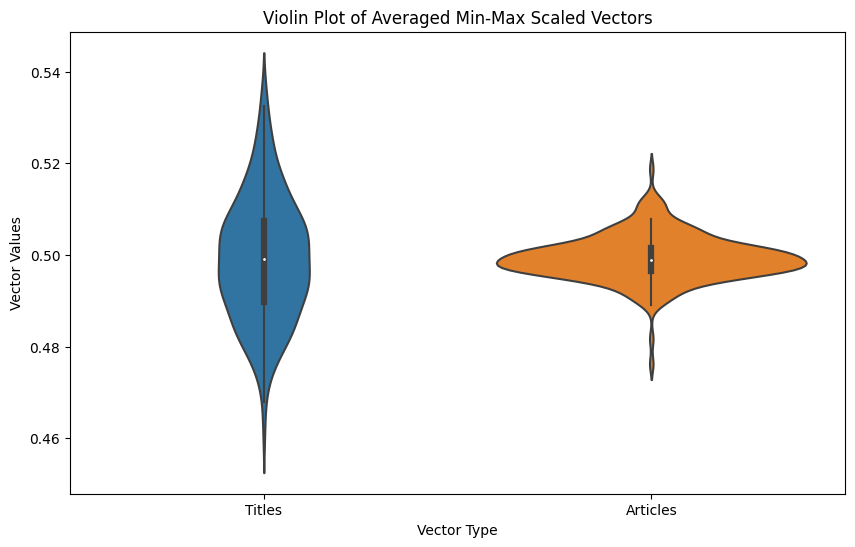

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Усредненяем длину векторов
df_idf['vector_titles_avg'] = df_idf['vector_titles_minmax'].apply(np.mean)
df_idf['vector_articles_avg'] = df_idf['vector_articles_minmax'].apply(np.mean)

visualization_df = pd.DataFrame({
    'Vector Type': ['Titles'] * len(df_idf['vector_titles_avg']) +
                   ['Articles'] * len(df_idf['vector_articles_avg']),
    'Vector Values': np.concatenate([df_idf['vector_titles_avg'],
                                     df_idf['vector_articles_avg']])
})

# Построение графика скрипки
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vector Type', y='Vector Values', data=visualization_df)
plt.title('Violin Plot of Averaged Min-Max Scaled Vectors')
plt.show()

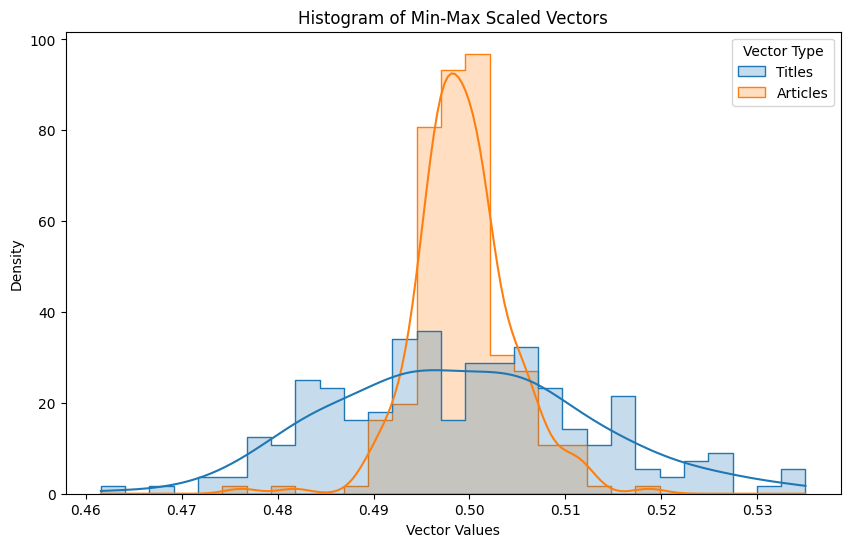

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=visualization_df, x='Vector Values', hue='Vector Type', element='step', stat='density', common_norm=False, kde=True)
plt.title('Histogram of Min-Max Scaled Vectors')
plt.show()

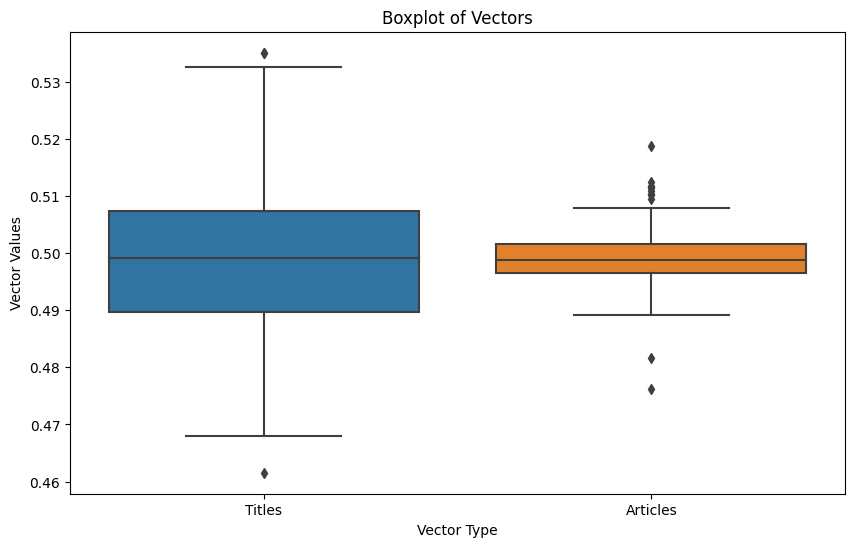

In [115]:
boxplot_df = pd.DataFrame({
    'Vector Type': ['Titles'] * len(df_idf['vector_titles_avg']) +
                   ['Articles'] * len(df_idf['vector_articles_avg']),
    'Vector Values': np.concatenate([df_idf['vector_titles_avg'],
                                     df_idf['vector_articles_avg']])
})

boxplot_df['Vector Values'] = pd.to_numeric(boxplot_df['Vector Values'], errors='coerce')

plt.figure(figsize=(10, 6))
ax_box = sns.boxplot(x='Vector Type', y='Vector Values', data=boxplot_df)
ax_box.set_title('Boxplot of Vectors')
ax_box.set_ylabel('Vector Values')
plt.show()

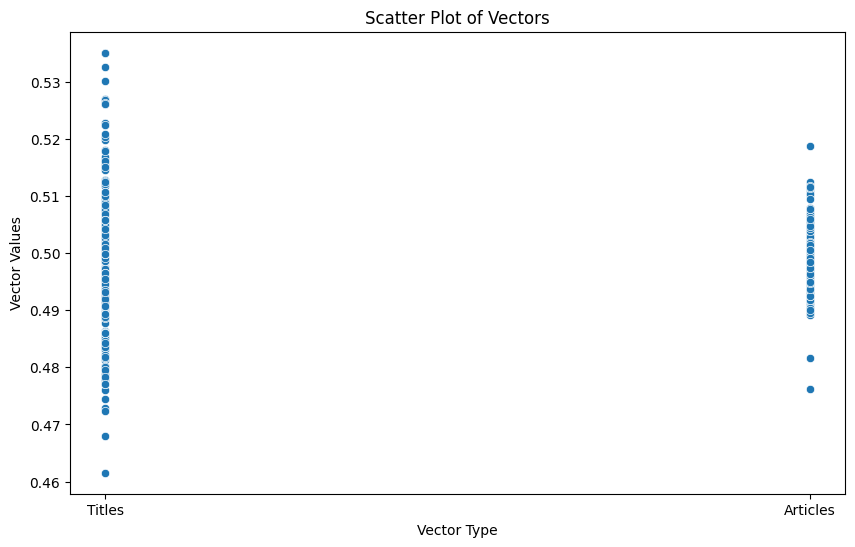

In [116]:
scatterplot_df = pd.DataFrame({
    'Vector Type': ['Titles'] * len(df_idf['vector_titles_avg']) +
                   ['Articles'] * len(df_idf['vector_articles_avg']),
    'Vector Values': np.concatenate([df_idf['vector_titles_avg'],
                                     df_idf['vector_articles_avg']])
})

scatterplot_df['Vector Values'] = pd.to_numeric(scatterplot_df['Vector Values'], errors='coerce')

plt.figure(figsize=(10, 6))
ax_scatter = sns.scatterplot(x='Vector Type', y='Vector Values', data=scatterplot_df)
ax_scatter.set_title('Scatter Plot of Vectors')
ax_scatter.set_ylabel('Vector Values')
plt.show()